In [ ]:
from shapely.geometry import Polygon
from shapely.geometry import Point
from shapely.geometry import LineString
import numpy as np

env_size=5
obstacles = Polygon([[1, 1], [2, 1], [2, 2], [1, 2], [1, 1]])
obstacles = obstacles.union(
                        Polygon([[3, 3], [4, 3], [4,,4], [3,,4], [3, 3]]))
obstacles = obstacles.union(
                        Polygon([[3, 1], [4, 1], [4, 2], [3, 2], [3, 1]]))
obstacles = obstacles.union(
                        Polygon([[1, 3], [2, 3], [2,,4], [1,,4], [1, 3]]))
boundary = Polygon([[0, 0], [env_size, 0], 
            [env_size, env_size], [0, env_size], [0, 0]])
boundary = boundary.difference(obstacles)
corners = np.array([[1,2],[2,1],[1,4],[4,1],[2,3],[3,2],[3,4],[4,3]])
goal = Polygon([[env_size, env_size-1], 
                             [env_size, env_size], 
                             [env_size-1, env_size], 
                             [env_size, env_size-1]])
point_goal = np.array([env_size,env_size])

In [ ]:
notOK = True
while notOK:
    x = np.array([np.random.uniform(low=np.array([0,0,0]), 
                                        high=np.array([5,5,2*np.pi]))])
    xp = Point(x.flatten())
    if not boundary.covers(xp) or goal.covers(xp):
        notOK = True
    else:
        notOK = False
state = x.flatten()
state

In [ ]:
NOT_found = True
state=state[:2]
points = []
points.append(state)
dist = 0
while NOT_found:
    line = LineString([point_goal, state])
    if boundary.covers(line):
        NOT_found = False
        points.append(point_goal)
    else:
        best_distance=10
        for i in range(len(corners)):
            if Point(state).distance(Point(corners[i,:])) < best_distance and (state < corners[i,:]).all():
                best = corners[i,:]
                best_distance = Point(state).distance(Point(corners[i,:]))
        dist += best_distance
        points.append(best)
        state = best
line = LineString(points)
line.length

In [ ]:
corners_dist = np.array([5.06449510224598,4.123105625617661, 3.6502815398728847, 2.23606797749979])

In [ ]:
import math
state = state[:2]
if (state>=4).any():
    best_distance = ((state[0] - point_goal[0])**2 + (state[1] - point_goal[1])**2)**0.5
else:
    best_distance=10
    closest = 0
    for i in range(len(corners)):
        dist = ((state[0] - corners[i,0])**2 + (state[1] - corners[i,1])**2)**0.5
        if dist < best_distance and (state < corners[i,:]).all():
            closest = i
            best_distance = dist
    best_distance += corners_dist[math.floor(closest/2)]
best_distance

In [ ]:
def shortest_path_length(self, x):
        # compute the shortest path connecting x to the goal through
        # corners of the obstacles
        # LEGACY FUNCTION
        NOT_found = True
        point=x[:2]
        points = []
        points.append(point)
        dist = 0
        while NOT_found:
            line = LineString([self.point_goal, point])
            if self.boundary.covers(line):
                NOT_found = False
                points.append(self.point_goal)
            else:
                best_dist=10
                for i in range(len(self.corners)):
                    if Point(point).distance(Point(self.corners[i,:])) \
                            < best_dist and (point < self.corners[i,:]).all():
                        best = self.corners[i,:]
                        best_dist = Point(point).distance(Point(self.corners[i,:]))
                dist += best_dist
                points.append(best)
                point = best
        line = LineString(points)

        return line.length

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = [i+1 for i in range(100)]
running_avg = [1]*100
a = plt.plot(x, running_avg)
plt.title('Running average of previous 100 scores')
running = [2]*100
b = plt.plot(x, running)

In [ ]:
ratio =[1]*1000
ratio = np.array(ratio)
ratio[ratio>=1] = 0
ratio


In [ ]:
import os
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense


class PolicyNetwork(keras.Model):
    def __init__(self, layer_sizes= [400, 300], n_actions=2, name='policy',
            chkpt_dir='tmp/ddpg'):
        super(PolicyNetwork, self).__init__()
        self.n_actions = n_actions

        self.model_name = name
        self.checkpoint_dir = chkpt_dir
        self.checkpoint_file = os.path.join(self.checkpoint_dir, 
                                            self.model_name+'_ddpg.h5')

        self.hidden_layers = []
        self.layers_num = len(layer_sizes)
        for i in range(self.layers_num):
            self.hidden_layers.append(Dense(layer_sizes[i], activation='relu'))
        self.mu1 = Dense(1, activation= 'sigmoid') 
        self.mu2 = Dense(1, activation= 'tanh') 

    def call(self, state):
        tmp = self.hidden_layers[0](state)
        for i in range(1, self.layers_num):
            tmp = self.hidden_layers[i](tmp)
        mu1 = self.mu1(tmp)
        mu2 = self.mu2(tmp)
        mu = tf.concat([mu1,mu2], axis=1)
        return mu


In [ ]:
import numpy as np
from shapely.geometry import Point

x = np.array([np.random.uniform(low=np.array([0,0,0]), 
                                        high=np.array([5,5,2*np.pi]))])
state = x.flatten()

In [ ]:
from tensorflow.keras.optimizers import Adam
policy = PolicyNetwork( name='policy')
policy.compile(optimizer=Adam(learning_rate=0.001))

In [ ]:
state = tf.convert_to_tensor([state], dtype=tf.float32)
a = policy(state)
a

In [ ]:
b=tf.convert_to_tensor((a[0][0] +1)/2)
act = [b,[a[0][1]]]
(a[0][0] +1)/2

In [ ]:
action = tf.reshape(tf.concat([(a[0][0] +1)/2,a[0][1]],0), (1,2))

In [ ]:
action = action.numpy().flatten()  


In [ ]:
import numpy as np

goals=np.zeros(5)
goals==0
norm=np.ones(5)
norm[goals==0]=0
norm

In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plt


file = pandas.read_csv('plots/Unicycle_data.csv')
data = np.array(file['normalized_score'])
data
x = [i+1 for i in range(len(data))]
running_avg1=np.zeros(len(data))
running_avg2=np.zeros(len(data))
for i in range(len(data)):
    running_avg1[i] = np.mean(data[max(0, i-100):(i+1)])
for i in range(len(data)):
    running_avg2[i] = np.mean(data[max(0, i-2000):(i+1)])
plt.plot(x, running_avg1)
plt.plot(x, running_avg2)
plt.legend(['100 episodes mean', '2000 episodes mean'])
plt.xlabel('Episodes')
plt.ylabel('Normalized score')
plt.yticks([0,1])
plt.title('Running average of normalized cost')
#plt.savefig('Unicycle_normalized_score_2000.pdf')

In [ ]:
import numpy as np

states = np.array([[0.05730002,4.5542898 ],
 [0.06597772,4.4880773 ],
 [0.06597772,4.4880773 ],
 [0.06591545,4.48816764],
 [0.16013622,4.52154602],
 [0.22516211,4.59746244],
 [0.22516211,4.59746244],
 [0.24290459,4.68546521],
 [0.24290459,4.68546521],
 [0.34219558,4.69699641],
 [0.44093787,4.71254089],
 [0.53690724,4.74049708],
 [0.6143857 ,4.80359211],
 [0.6143857 ,4.80359211],
 [0.71000943,4.77447557],
 [0.80973562,4.78128411],
 [0.90969145,4.78199101],
 [1.00929008,4.77351851],
 [1.08086791,4.83759153],
 [1.08086791,4.83759153],
 [1.17953779,4.85358918],
 [1.27507438,4.88292058],
 [1.27507441,4.88292061],
 [1.27507441,4.88292061],
 [1.27507492,4.88292101],
 [1.27507492,4.88292101],
 [1.37503189,4.88344581],
 [1.37503189,4.88344581],
 [1.37503189,4.88344581],
 [1.37503189,4.88344581],
 [1.42129671,4.79483861],
 [1.42129671,4.79483861],
 [1.50644213,4.7424752 ],
 [1.58688972,4.68314684],
 [1.64905944,4.60487428],
 [1.64905944,4.60487428],
 [1.65306888,4.61581253],
 [1.65306888,4.61581253],
 [1.73239937,4.55499853],
 [1.78989292,4.47322958],
 [1.78989292,4.47322958],
 [1.86993614,4.53310238],
 [1.86993613,4.53310244],
 [1.94925315,4.47227087],
 [2.0066898 ,4.39046195],
 [2.0066898 ,4.39046195],
 [2.08714187,4.44978424],
 [2.08700293,4.4504103 ],
 [2.15884833,4.38091276],
 [2.18277482,4.28807451],
 [2.18277482,4.28807451],
 [2.18277482,4.28807451],
 [2.28270084,4.29061612],
 [2.33011112,4.37861576],
 [2.33011112,4.37861576],
 [2.33011112,4.37861576],
 [2.4289398 ,4.39360113],
 [2.52539103,4.41984671],
 [2.60630252,4.47854083],
 [2.60630251,4.47854088],
 [2.67617114,4.4070563 ],
 [2.67783991,4.39692231],
 [2.67783991,4.39692231],
 [2.67783991,4.39692231],
 [2.67783991,4.39692231],
 [2.76972753,4.35757342],
 [2.86817024,4.34023265],
 [2.95821105,4.38364249],
 [2.9844919 ,4.48008332],
 [2.9844919 ,4.48008332],
 [3.07506276,4.52237541],
 [3.0906645 ,4.57191683],
 [3.0906645 ,4.57191683],
 [3.19040796,4.57876048],
 [3.2901714 ,4.58532654],
 [3.38996037,4.59152102],
 [3.48978086,4.59722238],
 [3.5896406 ,4.60224125],
 [3.68954625,4.60633672],
 [3.78949277,4.60941027],
 [3.88946525,4.61161858],
 [3.98944996,4.61327334],
 [4.08943988,4.61462161],
 [4.18943226,4.61579981],
 [4.28942517,4.61694714],
 [4.389417  ,4.618171  ]])

... loading models ...


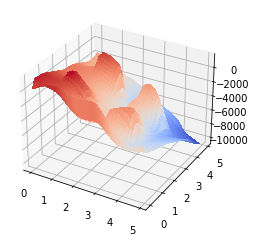

In [12]:
from ddpg import Agent
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import tensorflow as tf
import numpy as np
from env import UnicycleEnv
import math


env = UnicycleEnv()
agent = Agent(input_dims=env.observation_space.shape, alpha=0.0001,
                  beta=0.001, env=env, gamma=0.99,
                  n_actions=env.action_space.shape[0],
                  buffer_size=100000, qfun_layers=[400, 300],
                  policy_layers=[400, 300], batch_size=100, noise=0.05)
agent.load_models()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = np.arange(0, 5, 0.1)
Y = np.arange(0, 5, 0.1)
t = np.arange(0, 2*math.pi, math.pi/4)
a = np.arange(0, 1, 0.5)
o = np.arange(-1, 1, 0.5)
#X, Y = np.meshgrid(X, Y)
Z = np.zeros([50,50])

for i in range(len(X)):
    for j in range(len(Y)):
        count=0
        for k in range(len(t)):
            for l in range(len(a)):
                for m in range(len(o)):
                    state = np.array([[X[i],Y[j],t[k]]])
                    state = tf.convert_to_tensor(state, dtype=tf.float32)
                    action = np.array([[a[l],o[m]]])
                    actions = tf.convert_to_tensor(action, dtype=tf.float32)
                    Z[i,j] += agent.qfunction(state, actions)
                    count +=1
Z = Z/count
X, Y = np.meshgrid(X, Y)
Z = Z.reshape(X.shape)


# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#fig.savefig('qfunction.pdf')


In [19]:
ax.azim=-10
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
                       
fig.savefig('qfunction_azim-10.pdf')

In [3]:
from scipy.integrate import solve_ivp
from shapely.geometry import Polygon
from shapely.geometry import Point
import numpy as np
import math

def unicycle_derivative(t, state):
    # defined here so it can access action without receiving 
    # it as input (solve_ivp only wants a function depending
    # on time and initial state)
    der1 = action[0]*math.cos(state[2])
    der2 = action[0]*math.sin(state[2])
    out = np.array([der1,der2,action[1]])
    return out

action = np.array([1,1])  
done = False
x0 = np.array([0,0,0])  
sol = solve_ivp(unicycle_derivative, [0,0.1], x0)
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 26
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00e+00, 1.00e-04, 1.10e-03, 1.11e-02, 1.00e-01])
 t_events: None
        y: array([[0.00000000e+00, 9.99999998e-05, 1.09999978e-03, 1.10997721e-02,
        9.98334166e-02],
       [0.00000000e+00, 5.00000000e-09, 6.04999939e-07, 6.16043675e-05,
        4.99583472e-03],
       [0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
        1.00000000e-01]])
 y_events: None

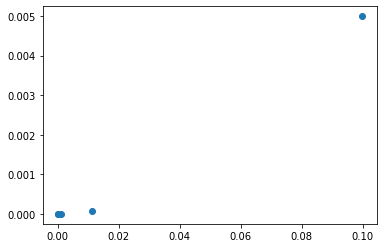

In [9]:
import matplotlib.pyplot as plt
plt.scatter(sol.y[0,:],sol.y[1,:])

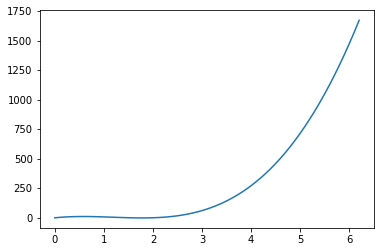

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import math

order = 3
exp=np.polyfit([0,math.pi/4,math.pi/2,3*math.pi/4],[0,10,0,10],order)

X = np.arange(0,2*math.pi,0.1)
Y=0
for i in range(order):
    Y += exp[i]*X**(order-i)
plt.plot(X,Y)


In [48]:
X = 1.5*math.pi
Y=0
for i in range(order):
    Y += exp[i]*X**(order-i)
Y

209.99999999999898

In [56]:
Y

array([ 0.00000000e+00,  3.77155079e+00,  6.65298214e+00,  8.72685799e+00,
        1.00757423e+01,  1.07821989e+01,  1.09287918e+01,  1.05980849e+01,
        9.87264211e+00,  8.83502741e+00,  7.56780470e+00,  6.15353791e+00,
        4.67479096e+00,  3.21412779e+00,  1.85411232e+00,  6.77308487e-01,
       -2.33719791e-01, -7.96408581e-01, -9.28193956e-01, -5.46511987e-01,
        4.31201254e-01,  2.08750970e+00,  4.50497726e+00,  7.76616789e+00,
        1.19536455e+01,  1.71499740e+01,  2.34377174e+01,  3.08994395e+01,
        3.96177043e+01,  4.96750758e+01,  6.11541178e+01,  7.41373943e+01,
        8.87074692e+01,  1.04946906e+02,  1.22938270e+02,  1.42764124e+02,
        1.64507031e+02,  1.88249557e+02,  2.14074265e+02,  2.42063719e+02,
        2.72300483e+02,  3.04867120e+02,  3.39846195e+02,  3.77320272e+02,
        4.17371914e+02,  4.60083685e+02,  5.05538151e+02,  5.53817873e+02,
        6.05005417e+02,  6.59183346e+02,  7.16434224e+02,  7.76840615e+02,
        8.40485083e+02,  